In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()
sns.set_style('whitegrid')

In [22]:
data = pd.read_csv('aggregated-accuracy-values.csv', delim_whitespace=True).set_index('language')
data = data.reindex(sorted(data.columns), axis=1)
data

,average-lingua,average-optimaize,average-tika,sentences-lingua,sentences-optimaize,sentences-tika,single-words-lingua,single-words-optimaize,single-words-tika,word-pairs-lingua,word-pairs-optimaize,word-pairs-tika
language,,,,,,,,,,,,
Afrikaans,78.566667,39.300000,70.900000,96.600000,93.100000,97.600000,60.900000,2.800000,45.000000,78.200000,22.000000,70.100000
Arabic,99.033333,90.833333,97.800000,99.900000,99.800000,100.000000,97.800000,77.200000,94.700000,99.400000,95.500000,98.700000
Belarusian,98.200000,91.233333,97.866667,99.200000,99.500000,99.800000,96.100000,78.400000,94.900000,99.300000,95.800000,98.900000
Bulgarian,94.200000,57.700000,88.833333,99.100000,96.800000,99.100000,87.900000,25.000000,78.600000,95.600000,51.300000,88.800000
Catalan,74.566667,31.700000,58.533333,87.800000,76.800000,84.600000,57.200000,2.100000,33.300000,78.700000,16.200000,57.700000
Croatian,93.400000,69.533333,88.500000,99.300000,99.100000,100.000000,84.600000,34.100000,74.100000,96.300000,75.400000,91.400000
Czech,88.466667,70.833333,82.433333,94.600000,89.500000,93.000000,79.500000,47.500000,68.500000,91.300000,75.500000,85.800000
Danish,83.266667,33.566667,72.500000,98.400000,80.400000,93.400000,66.600000,4.500000,52.800000,84.800000,15.800000,71.300000
Dutch,78.400000,39.033333,60.500000,96.500000,91.600000,97.600000,57.500000,6.200000,31.800000,81.200000,19.300000,52.100000


In [23]:
data.mean()

average-lingua            89.315936
average-optimaize         61.703755
average-tika              80.575328
sentences-lingua          98.048368
sentences-optimaize       94.845068
sentences-tika            97.922552
single-words-lingua       78.276098
single-words-optimaize    32.676997
single-words-tika         62.757290
word-pairs-lingua         91.623342
word-pairs-optimaize      57.589200
word-pairs-tika           81.046142
dtype: float64

In [24]:
data.std()

average-lingua             7.513198
average-optimaize         18.914787
average-tika              11.838964
sentences-lingua           2.680272
sentences-optimaize        6.183806
sentences-tika             3.138323
single-words-lingua       13.473736
single-words-optimaize    23.939310
single-words-tika         19.232252
word-pairs-lingua          7.963093
word-pairs-optimaize      29.032116
word-pairs-tika           14.901529
dtype: float64

In [25]:
data.median()

average-lingua            91.700000
average-optimaize         63.866667
average-tika              84.933333
sentences-lingua          99.100000
sentences-optimaize       97.097097
sentences-tika            99.200000
single-words-lingua       81.300000
single-words-optimaize    31.900000
single-words-tika         67.000000
word-pairs-lingua         94.800000
word-pairs-optimaize      66.900000
word-pairs-tika           85.800000
dtype: float64

In [26]:
### LINE PLOT CREATION ###
def create_lineplot(data, columns, title, ylim):
    filtered_data = data.loc[:, columns]
    
    plt.figure(figsize=(32,12))
    plt.title(title, fontsize=45, fontweight='bold')
    plt.xticks(rotation=90, fontsize=35)
    plt.yticks(fontsize=35)
    plt.grid(color='#A6A6A6')
    
    ax = sns.lineplot(data=filtered_data, linewidth=5, palette=['green', 'orange', 'red'])
    ax.set_ylim(ylim)
    ax.legend(labels=['Lingua', 'Tika', 'Optimaize'], fontsize=28, loc='lower left')
    ax.set_xlabel('Language', fontsize=38, fontweight='bold')
    ax.set_ylabel('Accuracy (%)', fontsize=38, fontweight='bold')

    plt.show()
    
### BOX PLOT CREATION ###    
def create_boxplot(data, columns, title, ylim):
    filtered_data = data.loc[:, columns]

    plt.figure(figsize=(32,12))
    plt.title(title, fontsize=45, fontweight='bold')
    plt.xticks(fontsize=35)
    plt.yticks(fontsize=35)
    plt.grid(color='#A6A6A6')

    ax = sns.boxplot(data=filtered_data, linewidth=5, palette=['red', 'orange', 'green'])
    ax.set_ylim(ylim)
    ax.set_xlabel('Classifier', fontsize=38, fontweight='bold')
    ax.set_ylabel('Accuracy (%)', fontsize=38, fontweight='bold')
    ax.set_xticklabels(['Optimaize', 'Tika', 'Lingua'])

    plt.show()

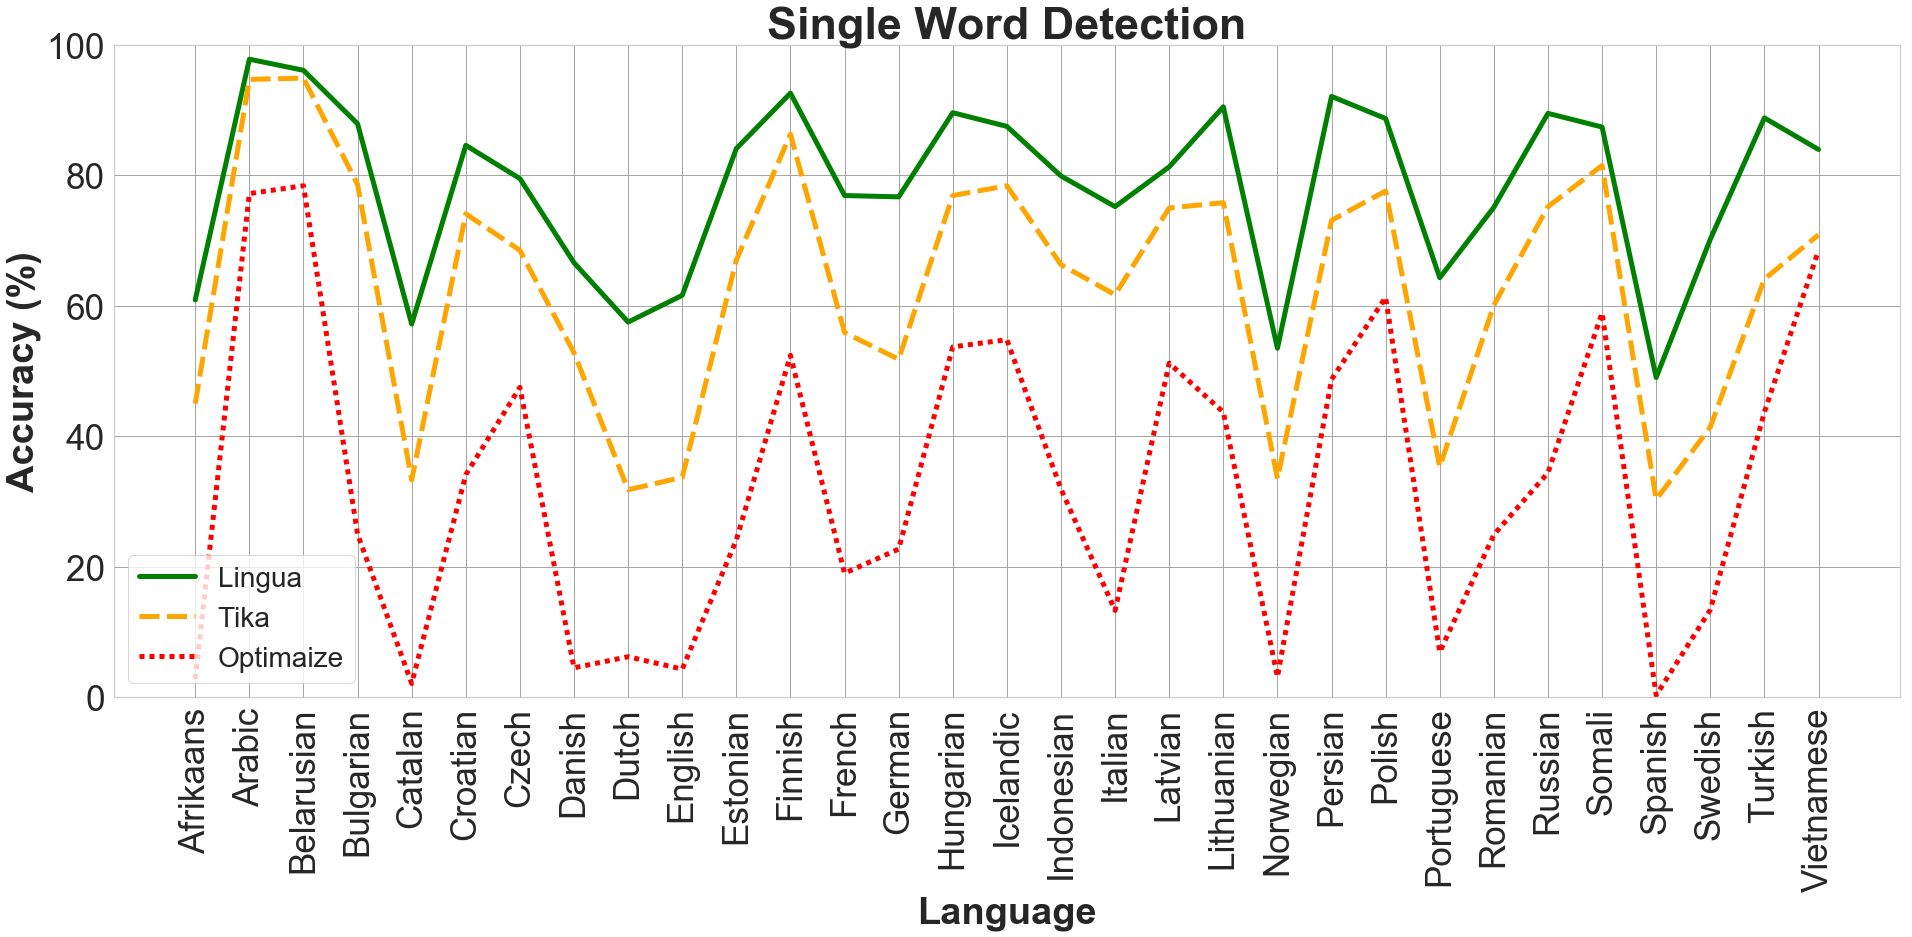

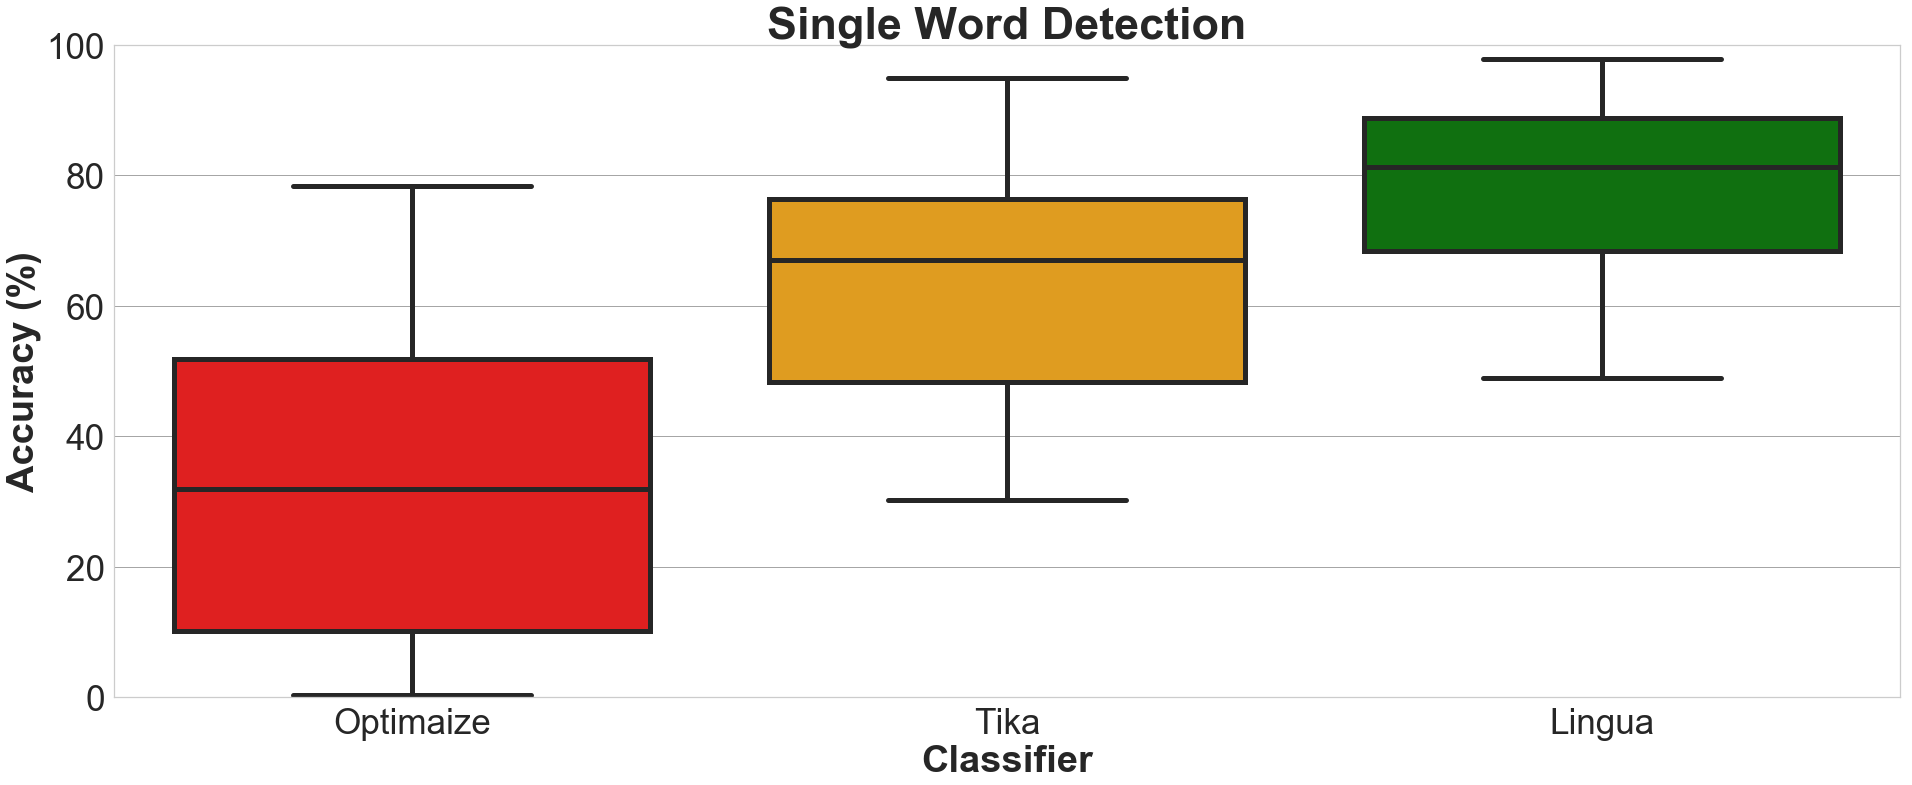

In [27]:
### SINGLE WORD DETECTION ACCURACY ###
create_lineplot(
    data=data, 
    columns=['single-words-lingua', 'single-words-tika', 'single-words-optimaize'], 
    title='Single Word Detection',
    ylim=[0,100]
)

create_boxplot(
    data=data,
    columns=['single-words-optimaize', 'single-words-tika', 'single-words-lingua'],
    title='Single Word Detection',
    ylim=[0,100]
)

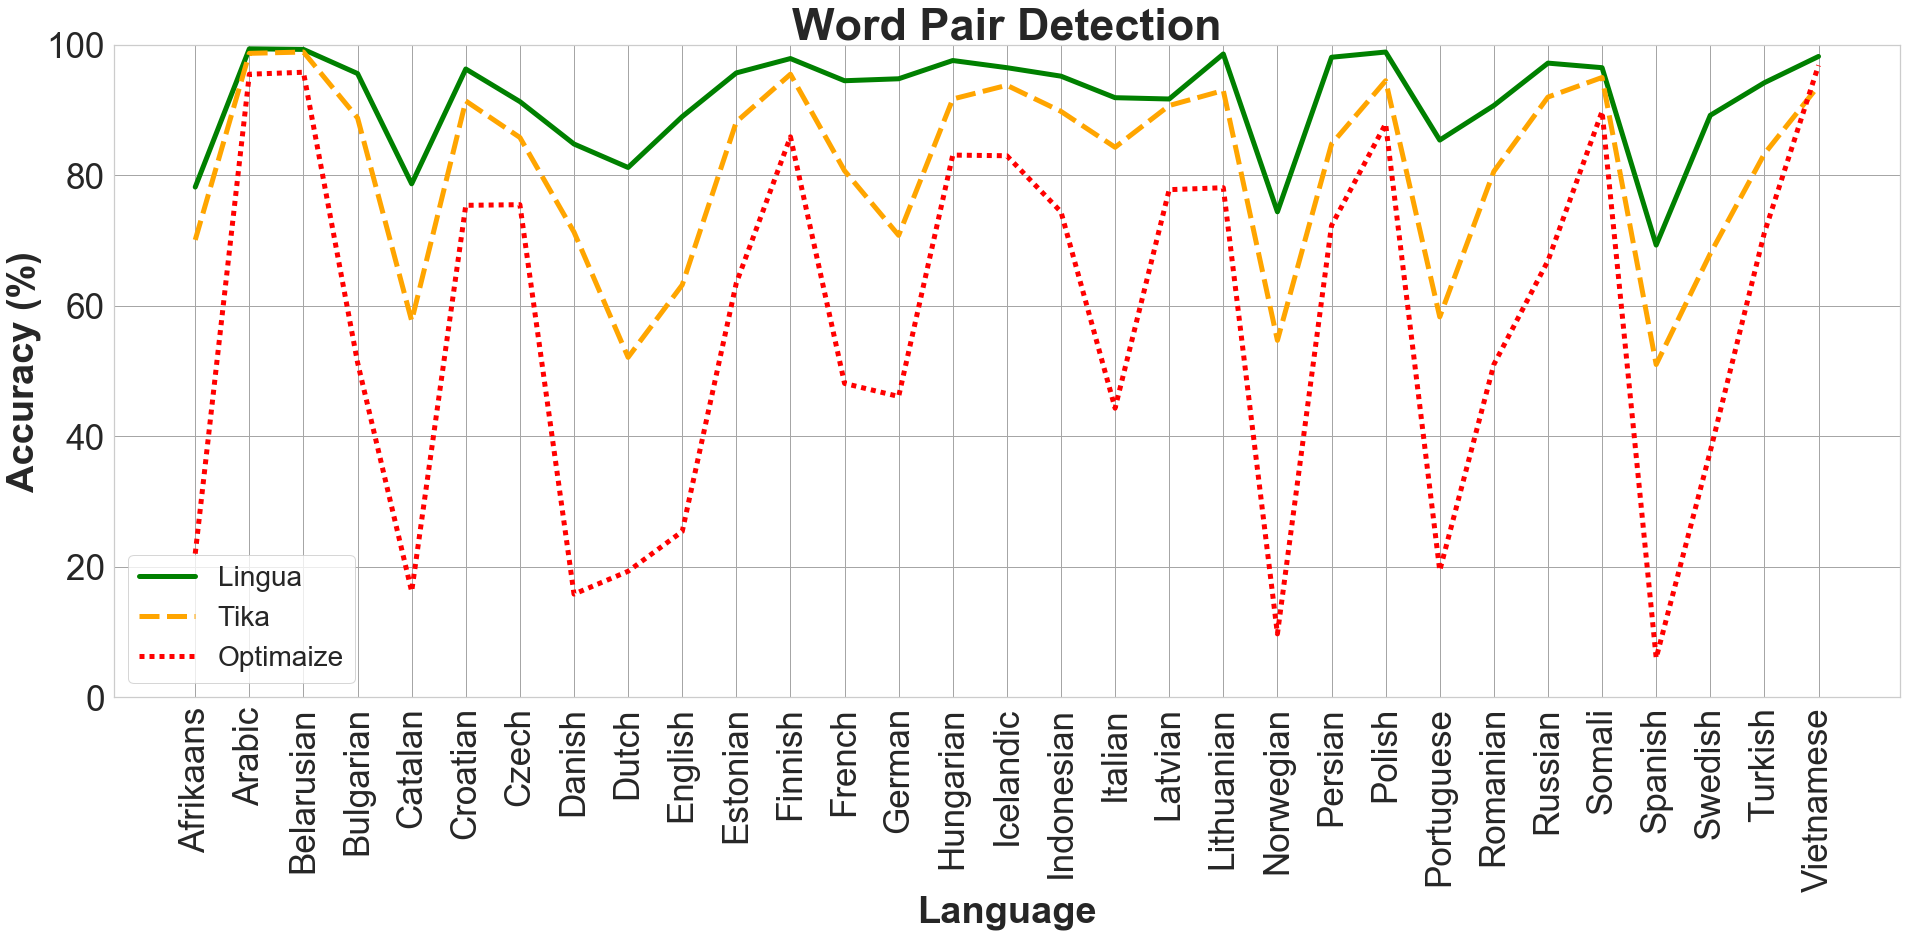

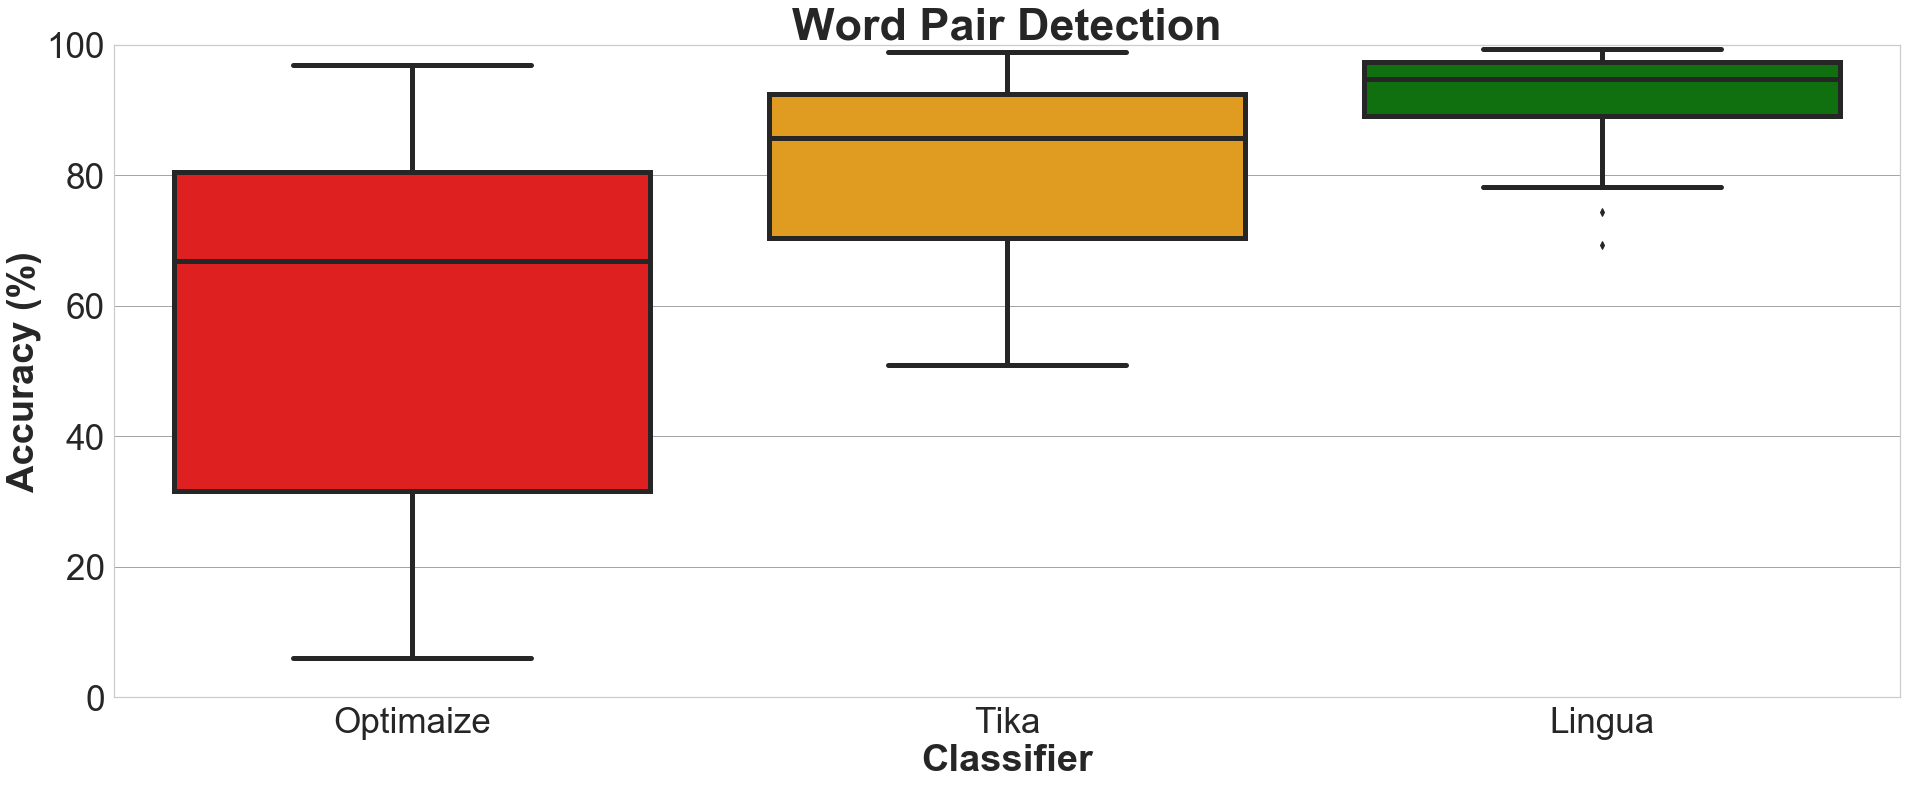

In [28]:
### WORD PAIR DETECTION ACCURACY ###
create_lineplot(
    data=data, 
    columns=['word-pairs-lingua', 'word-pairs-tika', 'word-pairs-optimaize'], 
    title='Word Pair Detection',
    ylim=[0,100]
)

create_boxplot(
    data=data,
    columns=['word-pairs-optimaize', 'word-pairs-tika', 'word-pairs-lingua'],
    title='Word Pair Detection',
    ylim=[0,100]
)

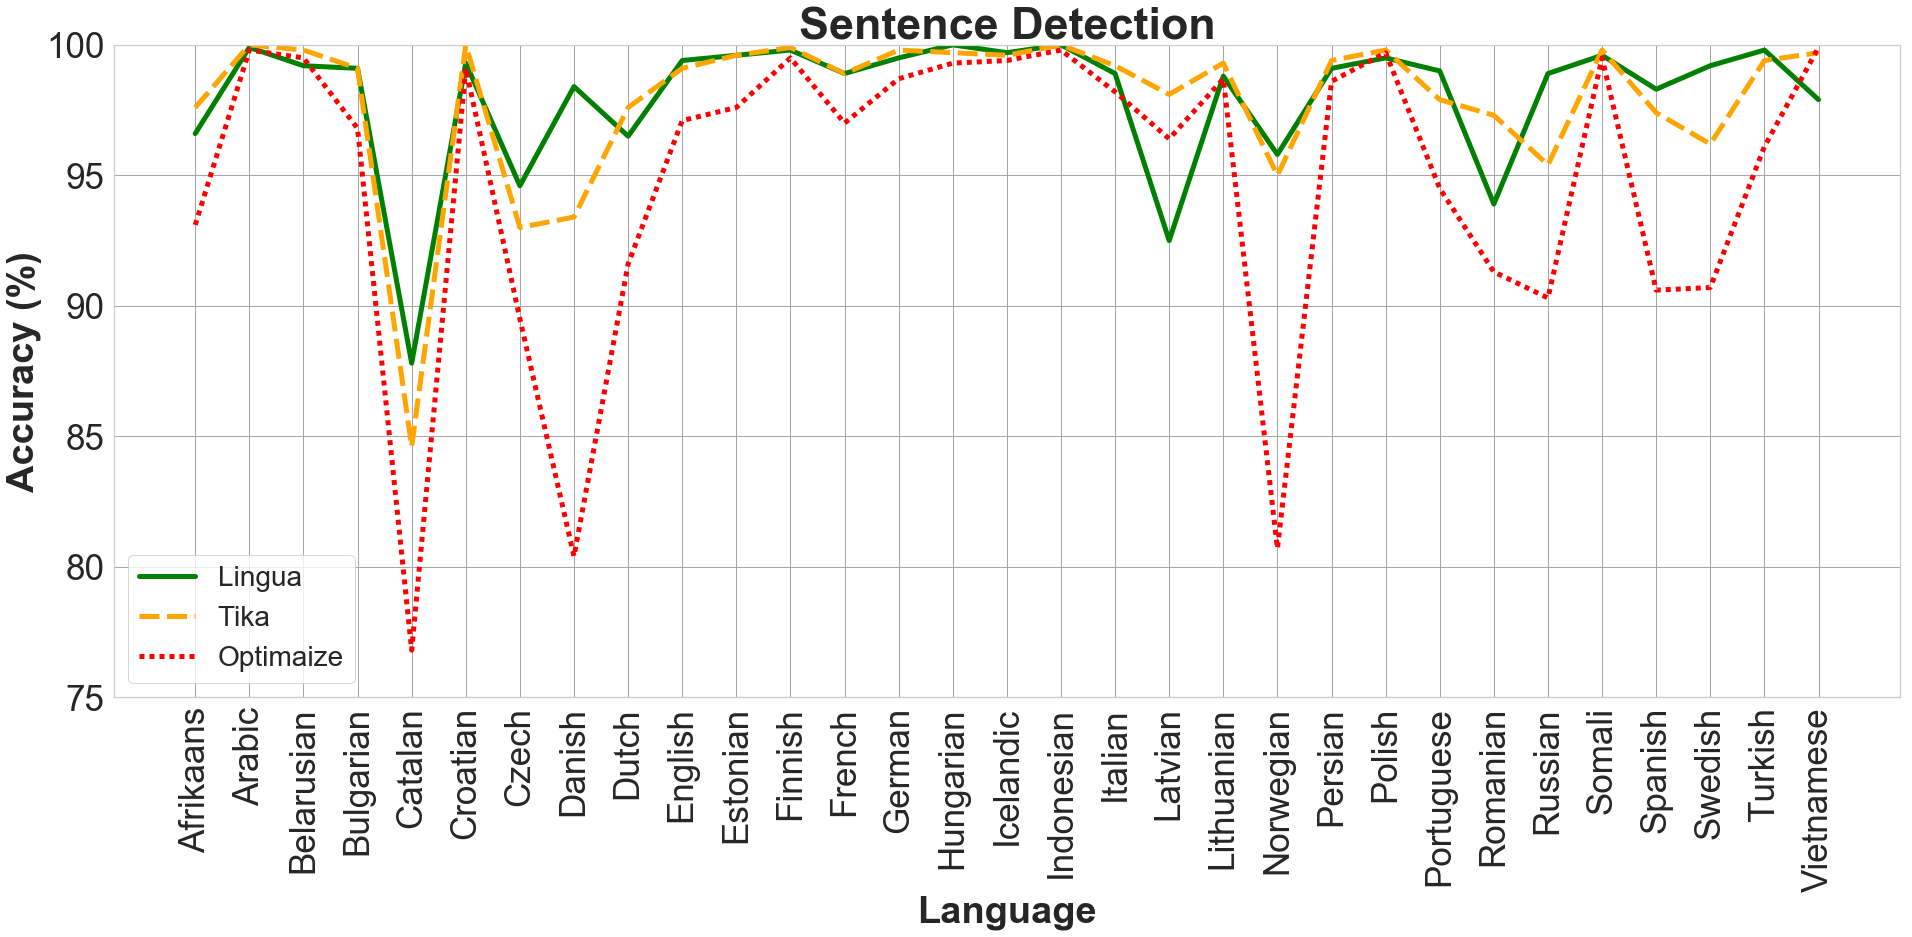

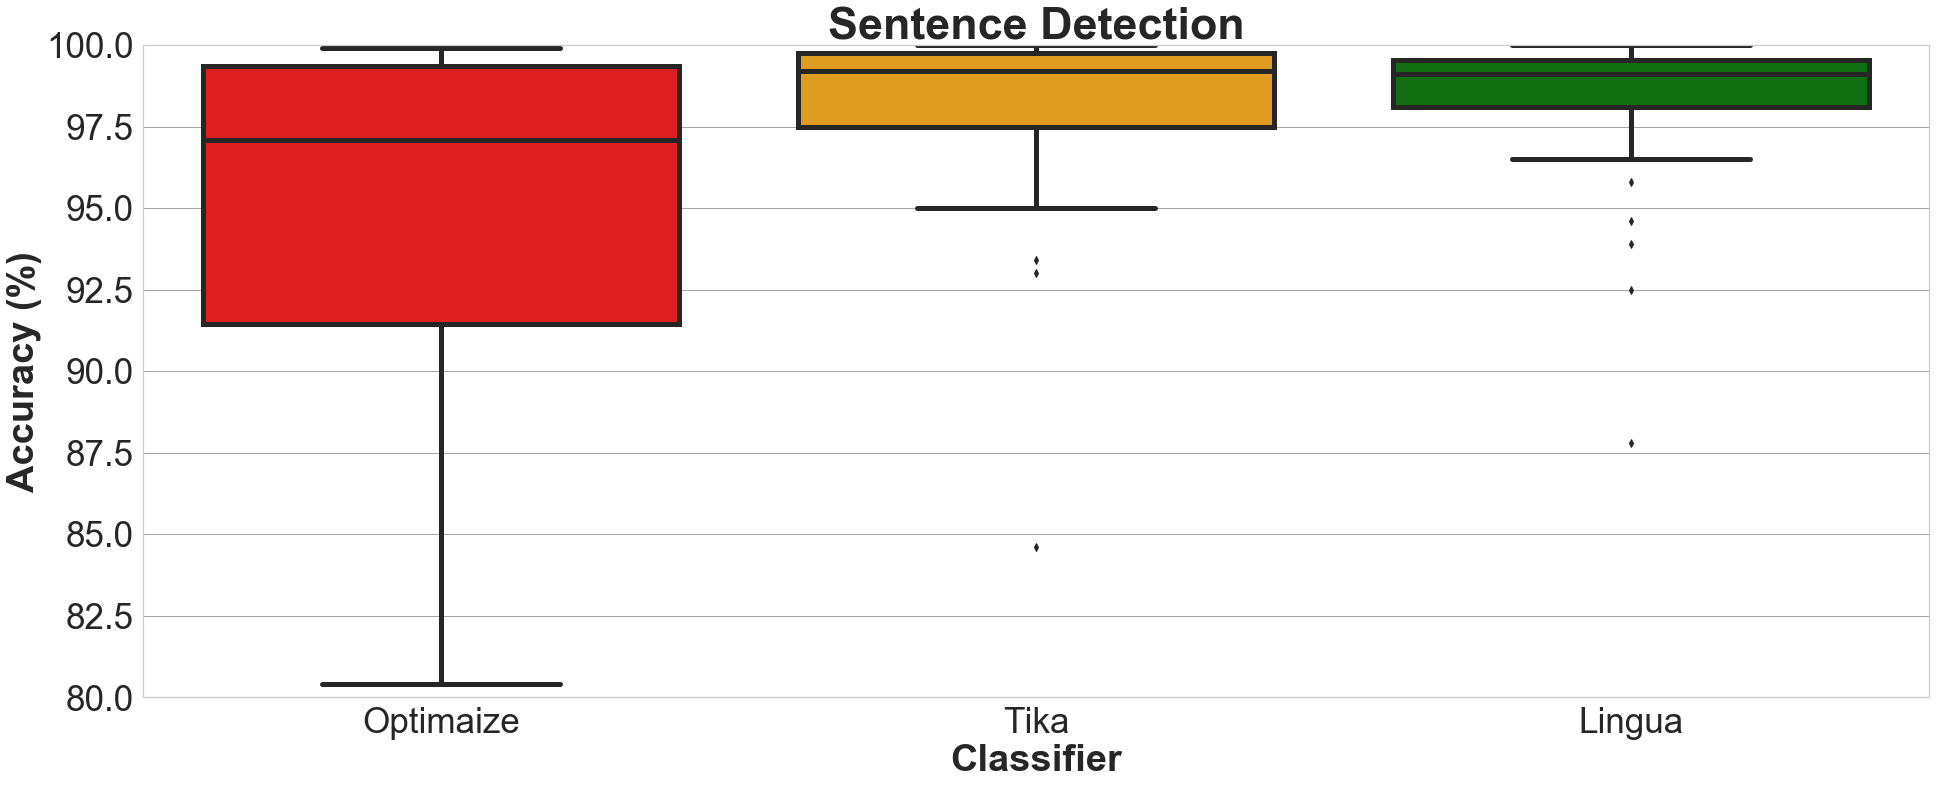

In [29]:
### SENTENCE DETECTION ACCURACY ###
create_lineplot(
    data=data, 
    columns=['sentences-lingua', 'sentences-tika', 'sentences-optimaize'], 
    title='Sentence Detection',
    ylim=[75,100]
)

create_boxplot(
    data=data,
    columns=['sentences-optimaize', 'sentences-tika', 'sentences-lingua'],
    title='Sentence Detection',
    ylim=[80,100]
)

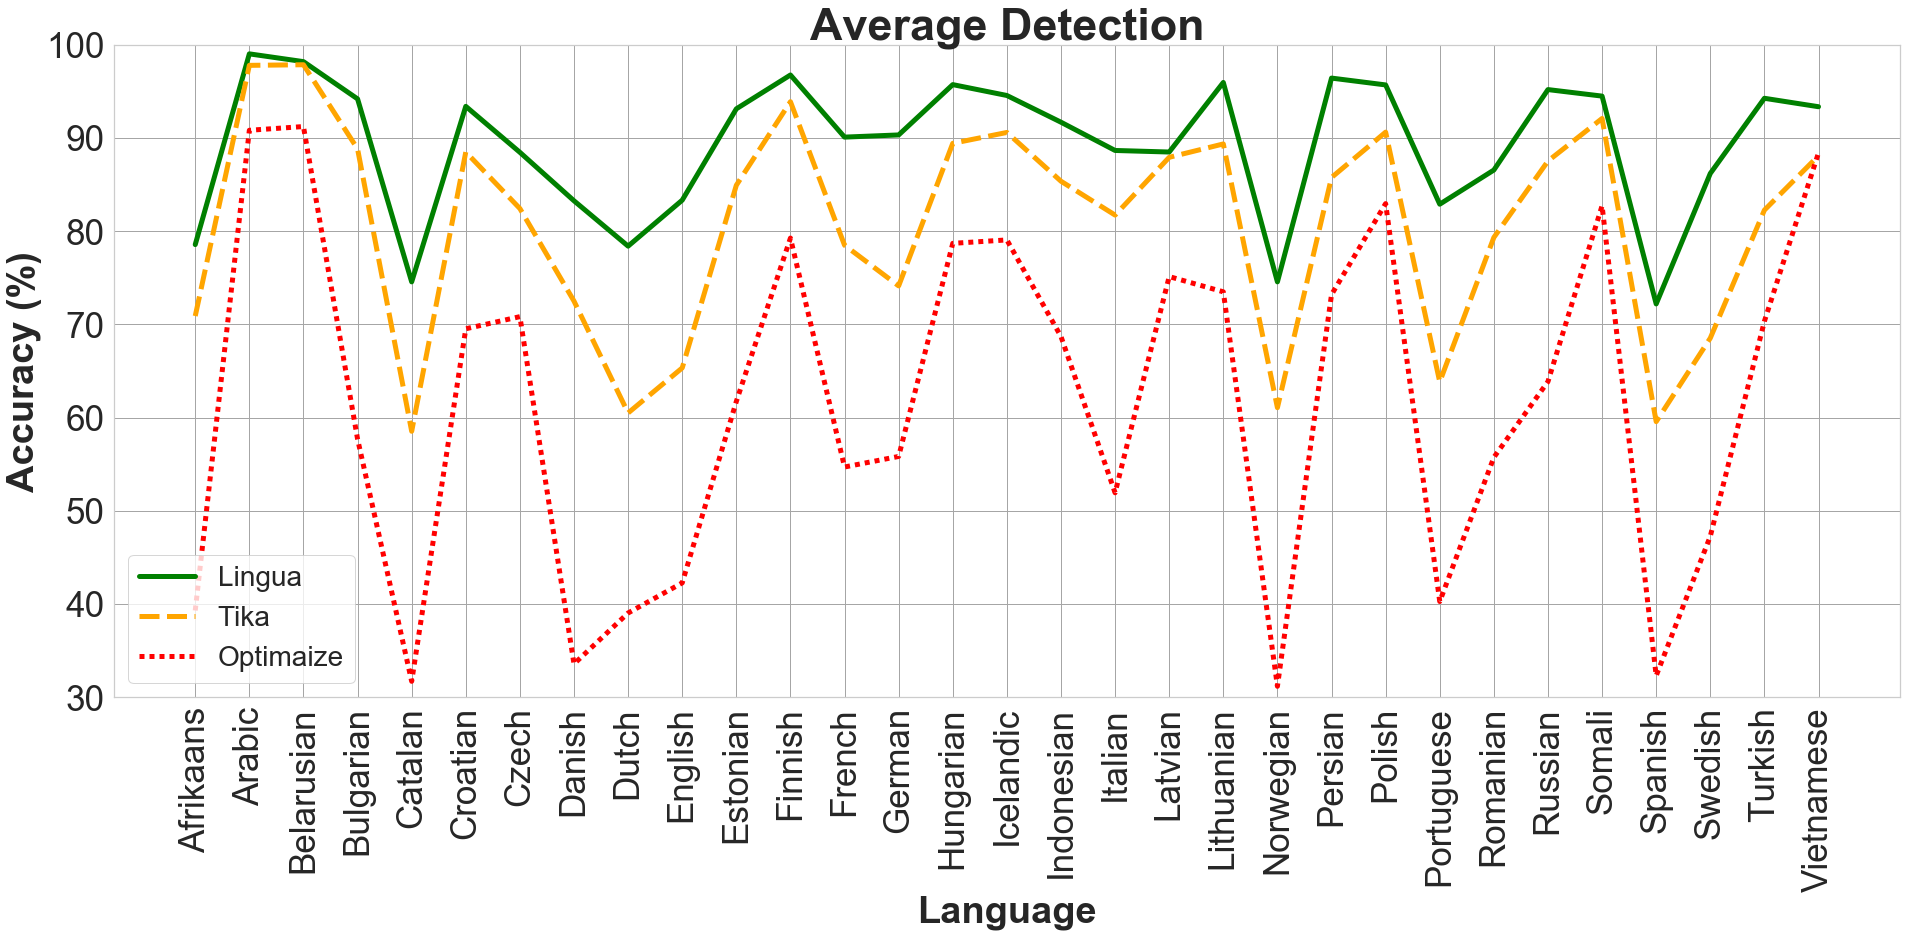

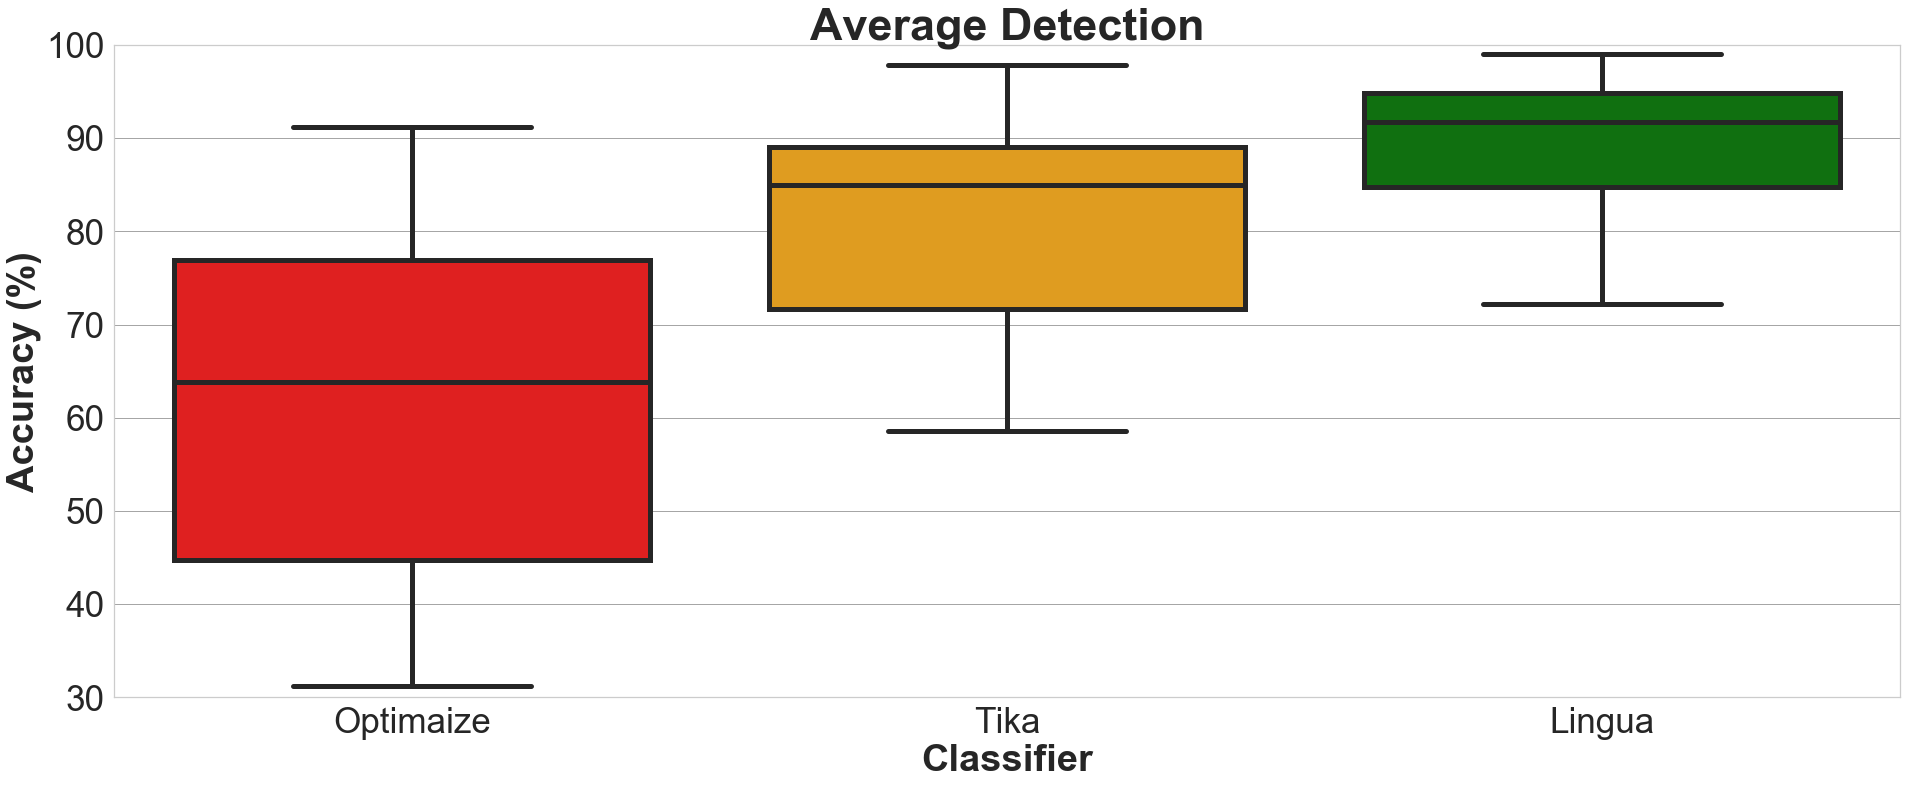

In [30]:
### AVERAGE DETECTION ACCURACY ###
create_lineplot(
    data=data, 
    columns=['average-lingua', 'average-tika', 'average-optimaize'], 
    title='Average Detection',
    ylim=[30,100]
)

create_boxplot(
    data=data,
    columns=['average-optimaize', 'average-tika', 'average-lingua'],
    title='Average Detection',
    ylim=[30,100]
)